# Population centrality

In [1]:
import pandas as pd

blocks_gdf = pd.read_pickle('./../../data/saint_petersburg/blocks.pickle')[['geometry', 'site_area', 'population']]
blocks_gdf.head()

,geometry,site_area,population
0,"POLYGON ((349424.859 6631180.891, 349424.751 6...",0.032316,0.0
1,"POLYGON ((352083.617 6633950.146, 352240.448 6...",137101.088247,0.0
2,"POLYGON ((346700.642 6618453.176, 346681.107 6...",95239.084434,109.0
3,"POLYGON ((347043.363 6618261.219, 347042.608 6...",125919.330984,77.0
4,"POLYGON ((354879.039 6618859.116, 354845.405 6...",169860.164494,431.0


In [2]:
from blocksnet.relations import generate_adjacency_graph

adjacency_graph = generate_adjacency_graph(blocks_gdf, 10)

2025-09-19 17:13:01.194 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_nodes:9 - Generating nodes
2025-09-19 17:13:01.202 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_edges:14 - Generating edges
2025-09-19 17:13:04.334 | SUCCESS  | blocksnet.relations.adjacency.core:generate_adjacency_graph:37 - Adjacency graph successfully generated: 9533 nodes, 30567 edges


In [3]:
from blocksnet.analysis.centrality import population_centrality

centrality_df = population_centrality(blocks_gdf, adjacency_graph)
centrality_df.head()

,population,degree_centrality,population_normalized,degree_centrality_normalized,population_centrality
0,0,0.000420,1.000000,1.086957,0.060606
1,0,0.000734,1.000000,1.152174,0.106061
2,109,0.000839,1.003471,1.173913,0.124052
3,77,0.000629,1.002452,1.130435,0.092841
4,431,0.000839,1.013723,1.173913,0.132440


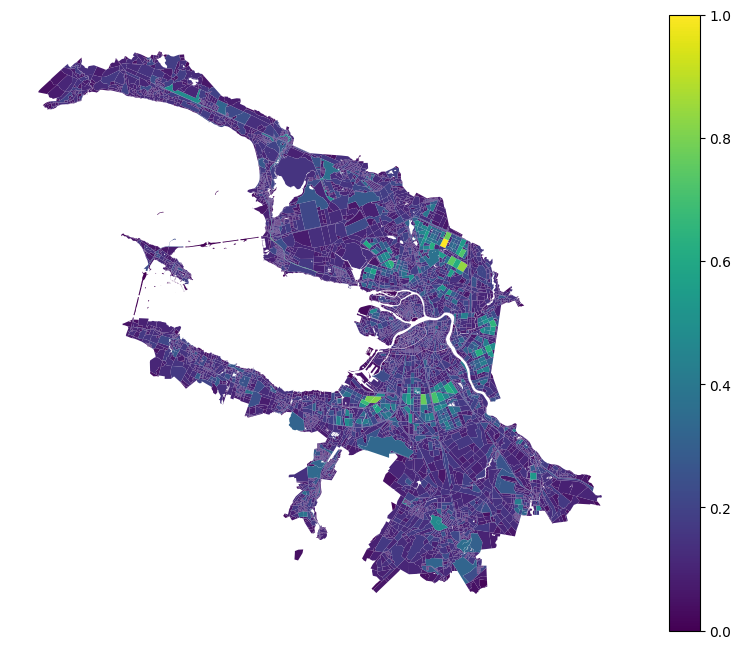

In [5]:
blocks_gdf[['geometry']].join(centrality_df).plot('population_centrality', legend=True, figsize=(10, 8)).set_axis_off()